In [ ]:
#download data---------------------------------------------------------

In [ ]:
!wget  http://vis-www.cs.umass.edu/lfw/lfw-bush.tgz

--2020-07-06 11:26:02--  http://vis-www.cs.umass.edu/lfw/lfw-bush.tgz
Resolving vis-www.cs.umass.edu (vis-www.cs.umass.edu)... 128.119.244.95
Connecting to vis-www.cs.umass.edu (vis-www.cs.umass.edu)|128.119.244.95|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7143480 (6.8M) [application/x-gzip]
Saving to: ‘lfw-bush.tgz’

lfw-bush.tgz        100%[===================>]   6.81M  7.06MB/s    in 1.0s    

2020-07-06 11:26:03 (7.06 MB/s) - ‘lfw-bush.tgz’ saved [7143480/7143480]



In [ ]:
import tarfile
tf = tarfile.open("lfw-bush.tgz")
tf.extractall()

In [ ]:
#process data---------------------------

In [ ]:
import numpy as np
img_dir="/content/lfw/George_W_Bush/"
import glob
from keras.preprocessing import image
image_size=(50,50)
def load_lfw_dataset():
  all_photos=[]
  for filename in glob.iglob(img_dir + '**/*.jpg', recursive=True):
    print(filename)
    im = image.load_img(filename)
    all_photos.append(im)
  all_photos = np.stack(all_photos).astype('uint8')
  return all_photos 

Using TensorFlow backend.


In [ ]:
X= load_lfw_dataset()


/content/lfw/George_W_Bush/George_W_Bush_0399.jpg
/content/lfw/George_W_Bush/George_W_Bush_0023.jpg
/content/lfw/George_W_Bush/George_W_Bush_0164.jpg
/content/lfw/George_W_Bush/George_W_Bush_0301.jpg
/content/lfw/George_W_Bush/George_W_Bush_0258.jpg
/content/lfw/George_W_Bush/George_W_Bush_0316.jpg
/content/lfw/George_W_Bush/George_W_Bush_0035.jpg
/content/lfw/George_W_Bush/George_W_Bush_0391.jpg
/content/lfw/George_W_Bush/George_W_Bush_0112.jpg
/content/lfw/George_W_Bush/George_W_Bush_0285.jpg
/content/lfw/George_W_Bush/George_W_Bush_0336.jpg
/content/lfw/George_W_Bush/George_W_Bush_0040.jpg
/content/lfw/George_W_Bush/George_W_Bush_0403.jpg
/content/lfw/George_W_Bush/George_W_Bush_0337.jpg
/content/lfw/George_W_Bush/George_W_Bush_0486.jpg
/content/lfw/George_W_Bush/George_W_Bush_0416.jpg
/content/lfw/George_W_Bush/George_W_Bush_0514.jpg
/content/lfw/George_W_Bush/George_W_Bush_0430.jpg
/content/lfw/George_W_Bush/George_W_Bush_0008.jpg
/content/lfw/George_W_Bush/George_W_Bush_0234.jpg


In [ ]:
X = X.astype('float32')/255


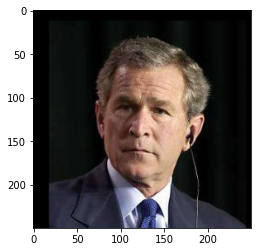

In [ ]:
import matplotlib.pyplot as plt
def show_image(x):
    plt.imshow(np.clip(x,0,50))


show_image(X[0])

In [ ]:
train, validate, test = np.split(X, [int(.7*len(X)), int(.9*len(X))])
train2=train
validate2=validate
test2=test
print(train.shape)
print(validate.shape)
print(test.shape)

(371, 250, 250, 3)
(106, 250, 250, 3)
(53, 250, 250, 3)


In [ ]:
#build model------------

In [ ]:
from keras.layers import Dense, Flatten, Reshape, Input, InputLayer
from keras.models import Sequential, Model

def build_encoder_decoder(img_shape, code_size):
    # The encoder
    encoder = Sequential()
    encoder.add(InputLayer(img_shape))
    encoder.add(Flatten())
    encoder.add(Dense(code_size))

    # The decoder
    decoder = Sequential()
    decoder.add(InputLayer((code_size,)))
    decoder.add(Dense(np.prod(img_shape))) # np.prod(img_shape) is the same as 250*250*3, it's more generic than saying 1875
    decoder.add(Reshape(img_shape))

    return encoder, decoder

In [ ]:
# Same as (250,250,3), we neglect the number of instances from shape
IMG_SHAPE = X.shape[1:]
encoder, decoder = build_encoder_decoder(IMG_SHAPE,250 )

inp = Input(IMG_SHAPE)
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = Model(inp,reconstruction)
autoencoder.compile(optimizer='adamax', loss='mse')

print(autoencoder.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 250, 250, 3)       0         
_________________________________________________________________
sequential_3 (Sequential)    (None, 250)               46875250  
_________________________________________________________________
sequential_4 (Sequential)    (None, 250, 250, 3)       47062500  
Total params: 93,937,750
Trainable params: 93,937,750
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#fitting of the model---------------------------------

In [ ]:
history = autoencoder.fit(x=train, y=train, epochs=10,
                validation_data=[validate,validate])

Train on 371 samples, validate on 106 samples
Epoch 1/10
371/371 [==============================] - 16s 42ms/step - loss: 46.1940 - val_loss: 3.2651
Epoch 2/10
371/371 [==============================] - 14s 39ms/step - loss: 5.2165 - val_loss: 0.5305
Epoch 3/10
371/371 [==============================] - 15s 39ms/step - loss: 0.8833 - val_loss: 0.3529
Epoch 4/10
371/371 [==============================] - 14s 39ms/step - loss: 0.3497 - val_loss: 0.1848
Epoch 5/10
371/371 [==============================] - 15s 39ms/step - loss: 0.2040 - val_loss: 0.1200
Epoch 6/10
371/371 [==============================] - 15s 39ms/step - loss: 0.1314 - val_loss: 0.0942
Epoch 7/10
371/371 [==============================] - 15s 39ms/step - loss: 0.1005 - val_loss: 0.0821
Epoch 8/10
371/371 [==============================] - 14s 39ms/step - loss: 0.0893 - val_loss: 0.0756
Epoch 9/10
371/371 [==============================] - 15s 39ms/step - loss: 0.0828 - val_loss: 0.0707
Epoch 10/10
371/371 [==============

In [ ]:
#testing-----------------------------------

In [ ]:
encoded_imgs=encoder.predict(test)
decoded_imgs=decoder.predict(encoded_imgs)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

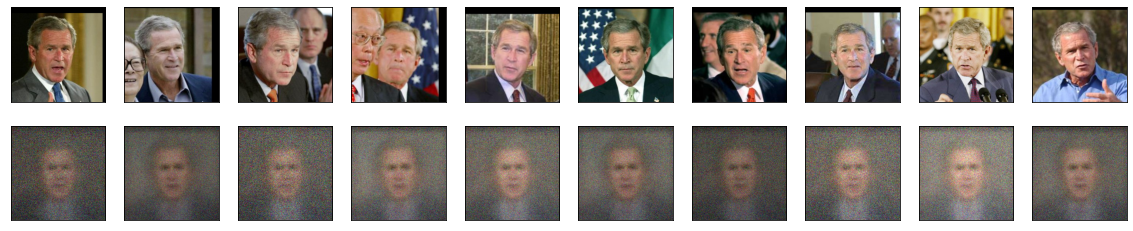

In [ ]:
n=10
plt.figure(figsize=(20,4))
for i in range(n):
  ax=plt.subplot(2,n,i+1)
  plt.imshow(test[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax=plt.subplot(2,n,i+1+n)
  plt.imshow(decoded_imgs[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)



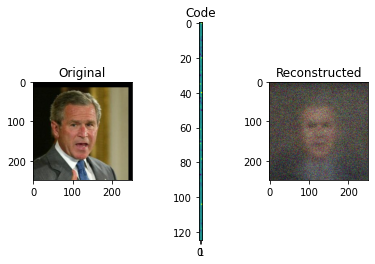

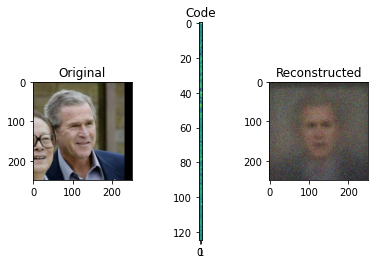

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


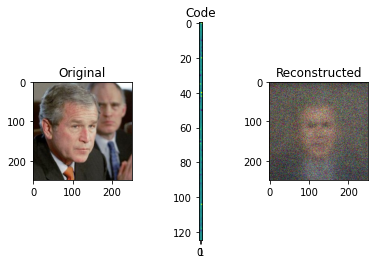

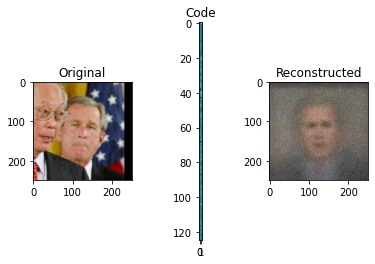

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


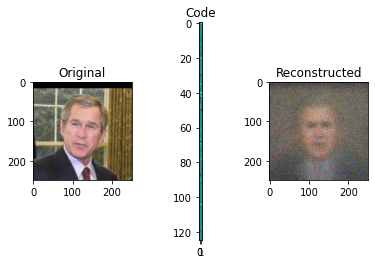

In [ ]:


def visualize(img,encoder,decoder):
    """Draws original, encoded and decoded images"""
   
    code = encoder.predict(img[None])[0]
    reco = decoder.predict(code[None])[0]
   

    plt.subplot(1,3,1)
    plt.title("Original")
    show_image(img)

    plt.subplot(1,3,2)
    plt.title("Code")
    plt.imshow(code.reshape([code.shape[-1]//2,-1]))

    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    show_image(reco)
    plt.show()

for i in range(5):
    img = test[i]
    visualize(img,encoder,decoder)

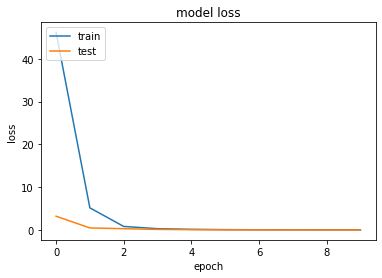

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#pca==========================

In [ ]:
#normalize data---------------------

In [65]:
from sklearn.preprocessing import StandardScaler
nsample,nx,ny,nz=train.shape
train2=train2.reshape(nsample,nx*ny*nz)

nsample2,nx2,ny2,nz2=test.shape
test2=test2.reshape(nsample2,nx2*ny2*nz2)
sc = StandardScaler()
X_train = sc.fit_transform(train2)
X_test = sc.transform(test2)
X_test.shape
X_train.shape

(371, 187500)

In [66]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_test.shape


(53, 5)

In [67]:
#reconstruct the images-----------------
approximation = pca.inverse_transform(X_test)
approximation.shape

(53, 187500)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


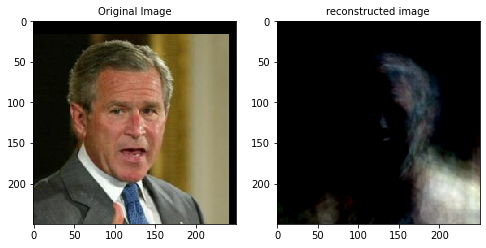

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


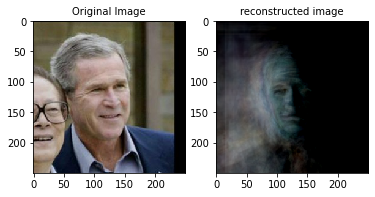

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


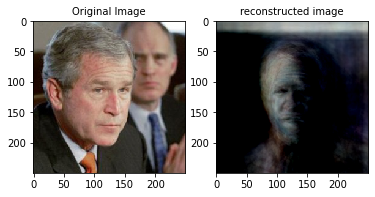

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


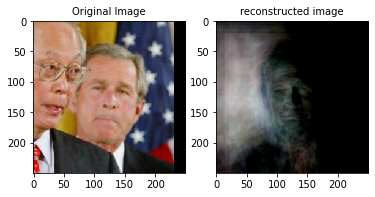

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


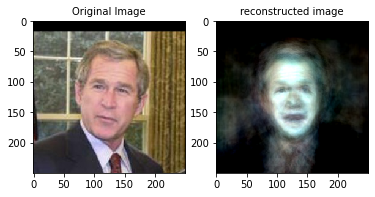

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


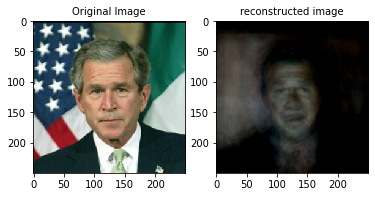

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


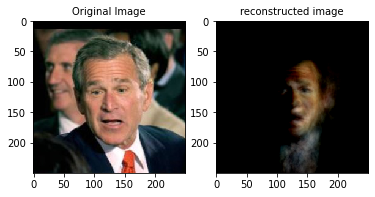

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


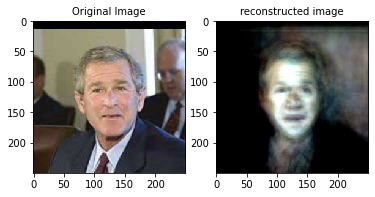

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


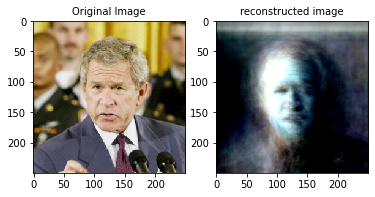

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


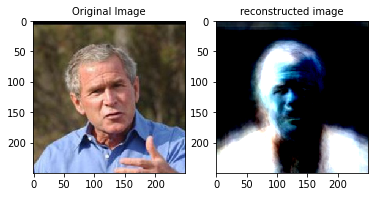

In [68]:
plt.figure(figsize=(8,4));
n=10
def show(i):

  # Original Image
  plt.subplot(1, 2, 1);
  plt.imshow(test2[i].reshape(250,250,-1),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
  #plt.xlabel('784 components', fontsize = 14)
  plt.title('Original Image', fontsize = 10);

  # 32 principal components
  plt.subplot(1, 2, 2);
  plt.imshow(approximation[i].reshape(250, 250,-1),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
  #plt.xlabel('154 components', fontsize = 14)
  plt.title('reconstructed image', fontsize = 10);
  plt.show()


for i in range(n):
  show(i)

In [69]:
loss = ((test2 - approximation) ** 2).mean()
loss*100

40.84877073764801